In [35]:
from scipy.io import loadmat
import numpy as np
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
import gmm_visualise as gmmvis

# Exercise 5: Clustering
This assignment is based on the previously generated 2-dimensional data of the three classes (5, 6 and 8) from the MNIST database of handwritten digits. 

First, mix the 2-dimensional data (training data only) by removing the labels and then use one Gaussian mixture model to model them. 

Secondly, compare the Gaussian mixture model with the Gaussian models trained in the previous assignment, in terms of mean and variance values as well as through visualisation.

## Loading the data and mixing
First we load the exercise data set, combine the individual training sets into one and shuffle the data to ensure a random shuffle (here with a seed to ensure reproducability). 

In [44]:
data_path = "2D568class.mat"
data = loadmat(data_path)
train5 = data["trn5_2dim"]/255
train6 = data["trn6_2dim"]/255
train8 = data["trn8_2dim"]/255

trainset = np.concatenate([train5, train6, train8])
np.random.seed(0)
np.random.shuffle(trainset)

## Creating a Gaussian Mixture model
First create a Gaussian Mixture Model of the data using sklearn

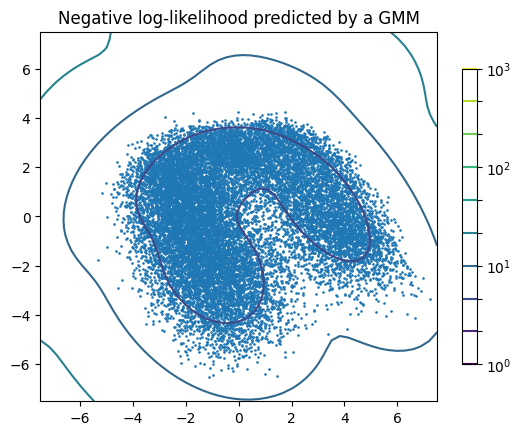

In [45]:
from matplotlib.colors import LogNorm

from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# concatenate the two datasets into the final training set
X_train = np.vstack([trainset])

# fit a Gaussian Mixture Model with two components
gm = GMM(n_components=3)
gm=gm.fit(trainset)    

# display predicted scores by the model as a contour plot
x = np.linspace(-7.5, 7.5)
y = np.linspace(-7.5, 7.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()


## Creating Gaussian models
Following the same approach from the previous exercises we can also estimate Gaussian models for each class

In [46]:
# Following the same approach from the previous exercises we can also estimate Gaussian models for each class

def compute_mean_covariance(data):
    # statistics
    mean = np.mean(data, axis=0) # To calcuate the mean from two dimentional data set np.mean(data, axis=0)
    covariance= np.cov(data, rowvar=False) # To calculate the covariance matrix np.cov(data, rowvar=False)

    return mean, covariance

mean5,cov5=compute_mean_covariance(train5)
mean6,cov6=compute_mean_covariance(train6)
mean8,cov8=compute_mean_covariance(train8)


## Comparing means and covariance matrices.
Let's look at the means and covariance matrices.

First we extract the means and covariances from the GMM.

In [39]:
gm_means=gm.means_
gm_covars=gm.covariances_

mean1_gmm=gm_means[0,:]
mean2_gmm=gm_means[1,:]
mean3_gmm=gm_means[2,:]

cov1_gmm=gm_covars[0]
cov2_gmm=gm_covars[1]
cov3_gmm=gm_covars[2]



Now we can compare the GMM means and covariances to the Gaussin models estimated for each class individually.

### Means

In [40]:
for name, mean in {"mean5": mean5, "mean6": mean6, "mean8": mean8, 
                   "mean1_gmm": mean1_gmm, "mean2_gmm": mean2_gmm, "mean3_gmm": mean3_gmm}.items():
    print(f"{name}: {np.array2string(mean)}")


mean5: [-1.09629628 -0.35037072]
mean6: [2.60384024 0.86074213]
mean8: [-1.61901038 -0.54586145]
mean1_gmm: [3.10726354 0.52307774]
mean2_gmm: [-1.43860167  1.61351073]
mean3_gmm: [-1.00256296 -2.06294658]


### Covariances

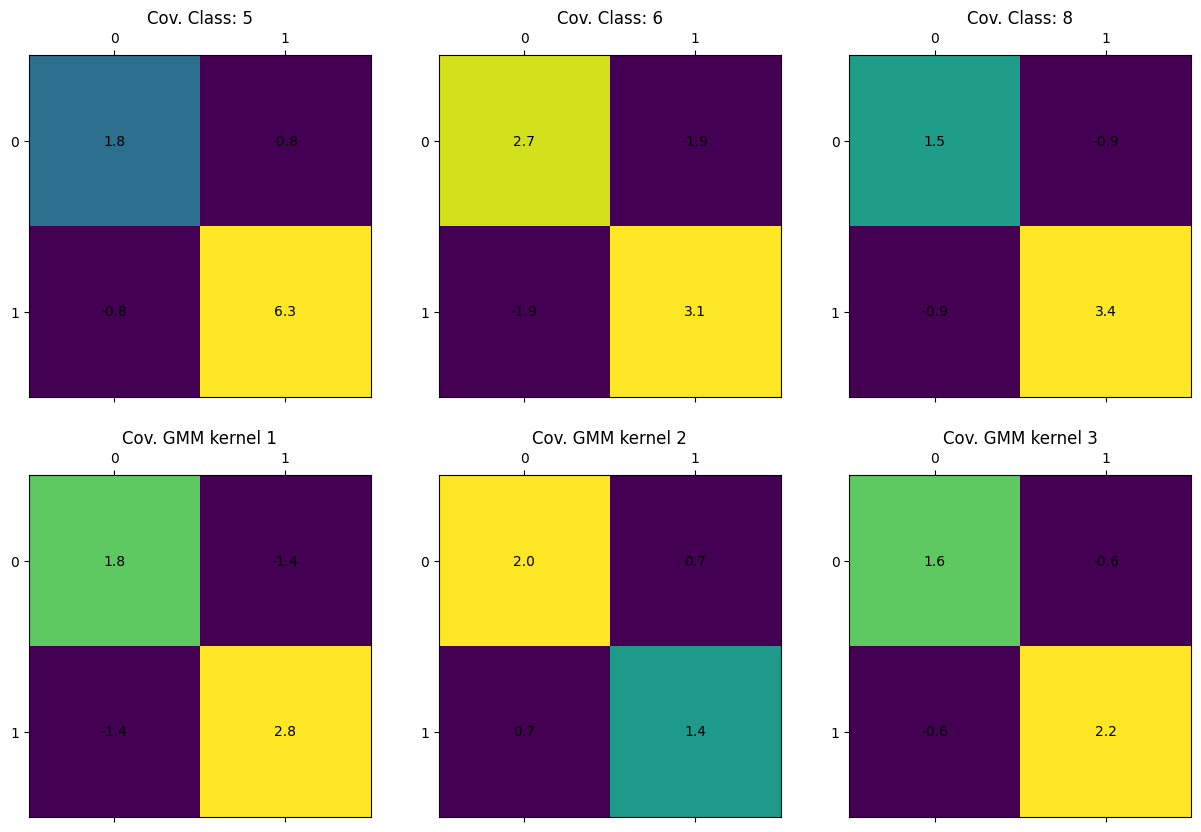

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].matshow(cov5)
for (i, j), z in np.ndenumerate(cov5):
    axs[0, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 0].set_title("Cov. Class: 5")

axs[1, 0].matshow(cov1_gmm)
for (i, j), z in np.ndenumerate(cov1_gmm):
    axs[1, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 0].set_title("Cov. GMM kernel 1")

axs[0, 1].matshow(cov6)
for (i, j), z in np.ndenumerate(cov6):
    axs[0, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 1].set_title("Cov. Class: 6")

axs[1, 1].matshow(cov2_gmm)
for (i, j), z in np.ndenumerate(cov2_gmm):
    axs[1, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 1].set_title("Cov. GMM kernel 2")

axs[0, 2].matshow(cov8)
for (i, j), z in np.ndenumerate(cov8):
    axs[0, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 2].set_title("Cov. Class: 8")

c = axs[1, 2].matshow(cov1_gmm)
for (i, j), z in np.ndenumerate(cov3_gmm):
    axs[1, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 2].set_title("Cov. GMM kernel 3")

plt.show()


What do we see when comparing means and covariances?

## Visualizing the models in contourplots.
Now we would like to visualize our models to compare them.

We first generate some points to be able to sample from the models.

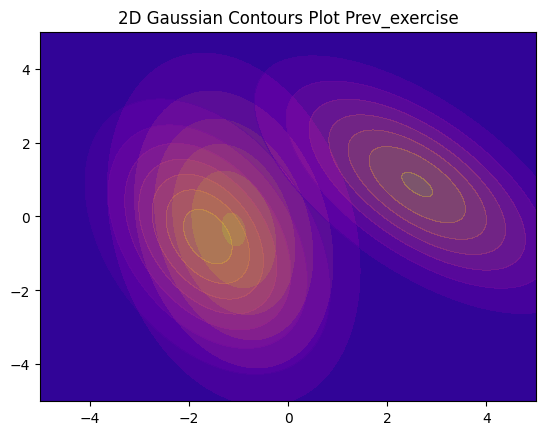

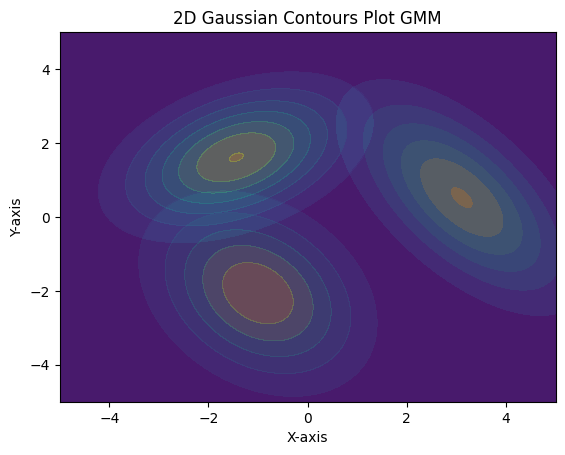

In [42]:
#Create points to do a contour a plot
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This contains the amplitude of the function
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N



# Create grid and multivariate normal
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y



# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)

Z = multivariate_gaussian(pos, mean5, cov5)
ax.contourf(X, Y, Z, cmap="plasma")

Z = multivariate_gaussian(pos, mean6, cov6)
ax.contourf(X, Y, Z, cmap="plasma", alpha=0.5)

Z = multivariate_gaussian(pos, mean8, cov8)
ax.contourf(X, Y, Z, cmap="plasma", alpha=0.25)

ax.set_title('2D Gaussian Contours Plot Prev_exercise')
fig = plt.figure()
ax = fig.add_subplot(111)

Z = multivariate_gaussian(pos, mean1_gmm, cov1_gmm)
ax.contourf(X, Y, Z, cmap="viridis")

Z = multivariate_gaussian(pos, mean2_gmm, cov2_gmm)
ax.contourf(X, Y, Z, cmap="viridis", alpha=0.5)

Z = multivariate_gaussian(pos, mean3_gmm, cov3_gmm)
ax.contourf(X, Y, Z, cmap="viridis", alpha=0.25)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Gaussian Contours Plot GMM')

plt.show()

We can also visualize the separate Gaussian models from the GMM by creating Gassians from the classwise means and covariances of the GMM model.

Now we sample from the models using the generated points.

The model samples can then be visualized in a contour plot.

In [43]:
#Plot contours for the GMM, seperated GMM and individual estimated densities
